In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
PATH = '/content/drive/MyDrive/meme_classification_data/'

#Data Exploration 


In [ ]:
data  = pd.read_csv(PATH+'train.csv')
data.head(3)

,ID,image id,text,label,label_num
0,1,image_2455.jpg,- It is not our fight - Are we not part of thi...,troll,2
1,2,image_3701.jpg,THAT'S THE DIFFERENCE BETWEEN YOU AND ME YOU...,none,0
2,3,image_4166.png,- WHAT DO THE TITANIC AND THE SIXTH SENSE HAVE...,none,0


In [ ]:
data.isnull().sum()

ID           0
image id     0
text         0
label        0
label_num    0
dtype: int64

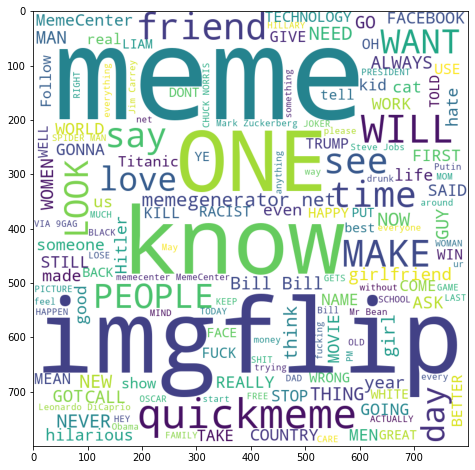

In [ ]:
import nltk
from wordcloud import WordCloud
allwords = " ".join(data['text'].values)
word_cloud = WordCloud().generate(allwords)

word_cloud = WordCloud(width=800,height=800,
                       background_color='white',
                       max_words=150).\
generate(allwords)

plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

#Text Cleaning

In [ ]:
from tqdm import tqdm
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

###Contractions

In [ ]:
contractions = {
"ain't": "are not",
"aren't": "are not",
"can't": "can not",
"can't've": "can not have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I would",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

###All Stop Words from nltk library

In [ ]:
from nltk.corpus import stopwords
all_stop_words = \
['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

###Custom Stop words 
####Removed negations, quantifiers and some others from list of all stop words manually.

In [ ]:
# removed negations, quantifiers and some others
custom_stop_words = \
['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'few',
 'more',
 'most',
 'so',
 'than',
 's',
 't',
 'can',
 'will',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]


###Functions for Text Cleaning

In [ ]:
import re
from nltk.stem import PorterStemmer
ps = PorterStemmer()
custom_stop_words_base = [ps.stem(w) for w in custom_stop_words]
all_stop_words_base = [ps.stem(w) for w in all_stop_words]

def expand_short_forms(word):
    if(word.lower() in contractions):
        return contractions[word.lower()]
    else:
        return word

def remove_special_chars_except_apostrophe(sentence):
    return re.sub(r"[^\w\d'\s]+",'',sentence.lower())

# remove special chars
# split into words
# get base form of words
# expand short forms

def clean_text_keep_stop_words(text):
    sent = re.sub(r"[^\w\d'\s]+",'',text.lower()) # remove special chars excecpt apostrophe
    words = sent.split() 
    base_words = [ps.stem(w) for w in words] # get stem words
    
    base_words_expanded = []
    for w in base_words:
        if w in contractions:
            base_words_expanded.append(contractions[w])
        else:
            base_words_expanded.append(w)
        
        sent = " ".join(base_words_expanded)
            
    return sent

def clean_text_and_custom_stop_words(text):
    sent = clean_text_keep_stop_words(text)
    words = sent.split()
    clean_words = []
    for w in words:
        if w not in custom_stop_words_base:
            clean_words.append(w)
    
    sent = " ".join(clean_words)       
    return sent

def clean_text_and_all_stop_words(text):
    sent = clean_text_keep_stop_words(text)
    words = sent.split()
    clean_words = []
    for w in words:
        if w not in all_stop_words_base:
            clean_words.append(w)
    
    sent = " ".join(clean_words)       
    return sent

filter_words = ["meme", "http", "www"]
def filter_words_after_cleaning(text):
    words = text.split()
    filtered_words = []
    for w in words:
        flg = 0
        for fw in filter_words:
            if fw in w:
                flg = 1
                break
            if 'com' in w and len(w) > 7:
                flg = 1
        
        if flg == 0:
            filtered_words.append(w)
        
    sent = " ".join(filtered_words)
    return sent

### Final Data After Cleaning

In [ ]:
new_data1 = pd.read_csv(PATH+'train.csv') # with all stop words
new_data2 = pd.read_csv(PATH+'train.csv') # without custom stop words
new_data3 = pd.read_csv(PATH+'train.csv') # without all stop words
new_data1['clean text'] = new_data1['text'].apply(clean_text_keep_stop_words)
new_data2['clean text'] = new_data2['text'].apply(clean_text_and_custom_stop_words)
new_data3['clean text'] = new_data3['text'].apply(clean_text_and_all_stop_words)
new_data1['clean text final'] = new_data1['clean text'].apply(filter_words_after_cleaning)        
new_data2['clean text final'] = new_data2['clean text'].apply(filter_words_after_cleaning)
new_data3['clean text final'] = new_data3['clean text'].apply(filter_words_after_cleaning)
new_data1.drop(['text', 'label', 'clean text'], axis = 1, inplace = True)
new_data2.drop(['text', 'label', 'clean text'], axis = 1, inplace = True)
new_data3.drop(['text', 'label', 'clean text'], axis = 1, inplace = True)
new_data1.rename(columns={'label_num' : 'label', 'clean text final' : 'text'}, inplace = True)
new_data2.rename(columns={'label_num' : 'label', 'clean text final' : 'text'}, inplace = True)
new_data3.rename(columns={'label_num' : 'label', 'clean text final' : 'text'}, inplace = True)

#### CleanedText1, with all stop words


In [ ]:
new_data1.head()

,ID,image id,label,text,Snt Ana Label
0,1,image_2455.jpg,2,it is not our fight are we not part of thi wor...,0
1,2,image_3701.jpg,0,that' the differ between you and me you wanna ...,1
2,3,image_4166.png,0,what do the titan and the sixth sens have in c...,2
3,4,448_image_batch_2.png,2,come on man you know the thing just ask my wif...,0
4,5,653_image_batch_2.png,0,those who believ without reason cannot be conv...,0


####CleanedText2, without custom stop words

In [ ]:
new_data2.head()

,ID,image id,label,text
0,1,image_2455.jpg,2,not fight not part world no not even book
1,2,image_3701.jpg,0,that' differ wanna lose small wanna win big ha...
2,3,image_4166.png,0,titan sixth sens common made fumat ici dead pe...
3,4,448_image_batch_2.png,2,come man know thing just ask wife joe dog face...
4,5,653_image_batch_2.png,0,believ without reason cannot convinc reason ja...


####CleanedText3, without all stop words

In [ ]:
new_data3.head()

,ID,image id,label,text
0,1,image_2455.jpg,2,fight part world even book
1,2,image_3701.jpg,0,that' differ wanna lose small wanna win big ha...
2,3,image_4166.png,0,titan sixth sens common made fumat ici dead pe...
3,4,448_image_batch_2.png,2,come man know thing ask wife joe dog face poni
4,5,653_image_batch_2.png,0,believ without reason cannot convinc reason ja...


#Simple Classifier using nltk sentiment analyser

In [ ]:
## Humorous/Positive if score > 0.01
## Troll/Negative if score < -0.01
## None otherwise(score in [-0.1, 0.1])

nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def SentimentAnalyzerLabel(text):
    
    sentiment_dict = analyser.polarity_scores(text) 
    
    if sentiment_dict['compound'] > 0.01 : 
        return 1 # Positive/ Humerous
  
    elif sentiment_dict['compound'] < - 0.01 : 
        return 2 # Troll / Negative
  
    else : 
        return 0 # Neutral

acc1 = [] # Accuracy of models on CleanText1
acc2 = [] # Accuracy of models on CleanText2
acc3 = [] # Accuracy of models on CleanText3
f1_score1 = []
f1_score2 = []
f1_score3 = []

new_data1['Snt Ana Label'] = new_data1['text'].apply(SentimentAnalyzerLabel)
acc1.append(new_data1.loc[new_data1['label'] == new_data1['Snt Ana Label']].shape[0] * 100 / new_data1.shape[0])
new_data2['Snt Ana Label'] = new_data2['text'].apply(SentimentAnalyzerLabel)
acc2.append(new_data2.loc[new_data2['label'] == new_data2['Snt Ana Label']].shape[0] * 100 / new_data2.shape[0])
new_data3['Snt Ana Label'] = new_data3['text'].apply(SentimentAnalyzerLabel)
acc3.append(new_data3.loc[new_data3['label'] == new_data3['Snt Ana Label']].shape[0] * 100 / new_data3.shape[0])

from sklearn.metrics import f1_score
f1_score1.append(f1_score(new_data1['label'], new_data1['Snt Ana Label'], average='weighted'))
f1_score2.append(f1_score(new_data2['label'], new_data2['Snt Ana Label'], average='weighted'))
f1_score3.append(f1_score(new_data3['label'], new_data3['Snt Ana Label'], average='weighted'))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


([0.3492376730578233], [0.34232533340691684], [0.3487033082043682])

#Simple SVM Models

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

#Train Test split of 3 datasets

X1 = new_data1['text'].values
X2 = new_data2['text'].values
X3 = new_data3['text'].values
y = data['label_num'].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y , test_size = 0.2, random_state = 42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y , test_size = 0.2, random_state = 42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y , test_size = 0.2, random_state = 42)

###SVM classifier on uni-gram split of text

In [ ]:
tfidf_vectorizer_uni = TfidfVectorizer(max_features=3000)
X_train_tfidf_uni = tfidf_vectorizer_uni.fit_transform(X1_train)
X_test_tfidf_uni = tfidf_vectorizer_uni.transform(X1_test)
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_tfidf_uni, y1_train)
predictions_SVM_uni = svclassifier.predict(X_test_tfidf_uni)
acc1.append(accuracy_score(predictions_SVM_uni, y1_test)*100)
f1_score1.append(f1_score(predictions_SVM,y1_test, average='weighted'))

X_train_tfidf_uni = tfidf_vectorizer_uni.fit_transform(X2_train)
X_test_tfidf_uni = tfidf_vectorizer_uni.transform(X2_test)
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_tfidf_uni, y2_train)
predictions_SVM_uni = svclassifier.predict(X_test_tfidf_uni)
acc2.append(accuracy_score(predictions_SVM_uni, y2_test)*100)
f1_score2.append(f1_score(predictions_SVM,y2_test, average='weighted'))


X_train_tfidf_uni = tfidf_vectorizer_uni.fit_transform(X3_train)
X_test_tfidf_uni = tfidf_vectorizer_uni.transform(X3_test)
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_tfidf_uni, y3_train)
predictions_SVM_uni = svclassifier.predict(X_test_tfidf_uni)
acc3.append(accuracy_score(predictions_SVM_uni, y3_test)*100)
f1_score3.append(f1_score(predictions_SVM,y3_test, average='weighted'))


##SVM classifier on bi-gram split of text

In [ ]:
tfidf_vectorizer_bi = TfidfVectorizer(ngram_range=(2,2), max_features=10000)
X_train_tfidf_bi = tfidf_vectorizer_bi1.fit_transform(X1_train)
X_test_tfidf_b1 = tfidf_vectorizer_bi1.transform(X1_test)
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_tfidf_bi, y1_train)
predictions_SVM = svclassifier.predict(X_test_tfidf_bi1)
acc1.append(accuracy_score(predictions_SVM, y1_test)*100)
f1_score1.append(f1_score(predictions_SVM,y1_test, average='weighted'))


X_train_tfidf_bi1 = tfidf_vectorizer_bi1.fit_transform(X2_train)
X_test_tfidf_bi1 = tfidf_vectorizer_bi1.transform(X2_test)
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_tfidf_bi1, y2_train)
predictions_SVM = svclassifier.predict(X_test_tfidf_bi1)
acc2.append(accuracy_score(predictions_SVM, y2_test)*100)
f1_score2.append(f1_score(predictions_SVM,y2_test, average='weighted'))


X_train_tfidf_bi1 = tfidf_vectorizer_bi1.fit_transform(X3_train)
X_test_tfidf_bi1 = tfidf_vectorizer_bi1.transform(X3_test)
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_tfidf_bi1, y3_train)
predictions_SVM = svclassifier.predict(X_test_tfidf_bi1)
acc3.append(accuracy_score(predictions_SVM, y3_test)*100)
f1_score3.append(f1_score(predictions_SVM,y3_test, average='weighted'))





##SVM classifier on tri-gram split of text

In [ ]:
tfidf_vectorizer_tri = TfidfVectorizer(ngram_range=(3,3), max_features=10000)
X_train_tfidf_tri = tfidf_vectorizer_tri.fit_transform(X1_train)
X_test_tfidf_tri = tfidf_vectorizer_tri.transform(X1_test)
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_tfidf_tri, y1_train)
predictions_SVM = svclassifier.predict(X_test_tfidf_tri)
acc1.append(accuracy_score(predictions_SVM, y1_test)*100)
f1_score1.append(f1_score(predictions_SVM,y1_test, average='weighted'))

X_train_tfidf_tri = tfidf_vectorizer_tri.fit_transform(X2_train)
X_test_tfidf_tri = tfidf_vectorizer_tri.transform(X2_test)
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_tfidf_tri, y2_train)
predictions_SVM = svclassifier.predict(X_test_tfidf_tri)
acc2.append(accuracy_score(predictions_SVM, y2_test)*100)
f1_score2.append(f1_score(predictions_SVM,y2_test, average='weighted'))

X_train_tfidf_tri = tfidf_vectorizer_tri.fit_transform(X3_train)
X_test_tfidf_tri = tfidf_vectorizer_tri.transform(X3_test)
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_tfidf_tri, y3_train)
predictions_SVM = svclassifier.predict(X_test_tfidf_tri)
acc3.append(accuracy_score(predictions_SVM, y3_test)*100)
f1_score3.append(f1_score(predictions_SVM,y3_test, average='weighted'))

#Results and comparison


In [ ]:
models = ['NLTK-Sentiment-Analyzer', 'SVM-1gram', 'SVM-2gram', 'SVM-3gram']
model_test_scores = pd.DataFrame(list(zip(models,acc1,acc2,acc3)), columns = ['model', \
                                'w all stop words', 'w/o custom stop words', 'w/o all stop words'])
display("Accuracy",model_test_scores.head())

'Accuracy'

,model,w all stop words,w/o custom stop words,w/o all stop words
0,NLTK-Sentiment-Analyzer,34.856856,34.203918,34.806630
1,SVM-1gram,41.102757,38.847118,39.598997
2,SVM-2gram,38.345865,36.340852,36.591479
3,SVM-3gram,36.842105,37.844612,37.844612


In [ ]:
models = ['NLTK-Sentiment-Analyzer', 'SVM-1gram', 'SVM-2gram', 'SVM-3gram']
model_test_scores = pd.DataFrame(list(zip(models,f1_score1,f1_score2,f1_score3)), columns = ['model', \
                                'w all stop words', 'w/o custom stop words', 'w/o all stop words'])
display('f1-score',model_test_scores.head())

'f1-score'

,model,w all stop words,w/o custom stop words,w/o all stop words
0,NLTK-Sentiment-Analyzer,0.349238,0.342325,0.348703
1,SVM-1gram,0.517917,0.517917,0.517917
2,SVM-2gram,0.438116,0.406238,0.416492
3,SVM-3gram,0.427224,0.514291,0.517917
